In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, AveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to (28, 28, 1) and normalize
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
import matplotlib.pyplot as plt

def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.5352 - accuracy: 0.8378 - val_loss: 0.2076 - val_accuracy: 0.9381
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1738 - accuracy: 0.9481 - val_loss: 0.1247 - val_accuracy: 0.9611
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1153 - accuracy: 0.9655 - val_loss: 0.0900 - val_accuracy: 0.9704
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0882 - accuracy: 0.9734 - val_loss: 0.0738 - val_accuracy: 0.9772
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0726 - accuracy: 0.9783 - val_loss: 0.0610 - val_accuracy: 0.9811
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0639 - accuracy: 0.9807 - val_loss: 0.0584 - val_accuracy: 0.9802
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0524 - val_accuracy: 0.9839

1/1 [==============================] - 0s 88ms/step
Predicted Digit: 5


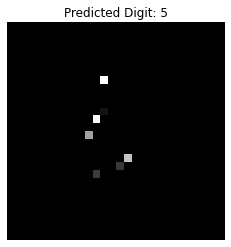

In [10]:
import cv2
img = cv2.imread('dig.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img.astype('float')/255.0
img = img.reshape(1, 28, 28, 1)
prediction = model.predict(img)
predicted_class = np.argmax(prediction)
print(f"Predicted Digit: {predicted_class}")
import matplotlib.pyplot as plt

plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()
